<a href="https://colab.research.google.com/github/argennof/M_Predicci-n_Lluvias_Extremas/blob/main/TP1/TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mentoría "Predicción de lluvias extremas"
Grupo 1:
- Laura Velazquez
- Florencia Balbuena
- Sebastián Sera
- Diana Fonnegra

# TP 1: Análisis y Visualización de Datos

## 1 a) Importación de librerías

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
from statsmodels.tsa.stattools import adfuller

Links útiles (ordenados de simples a complejos):

https://towardsdatascience.com/time-series-analysis-for-machine-learning-with-python-626bee0d0205

https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

https://towardsdatascience.com/playing-with-time-series-data-in-python-959e2485bff8

## 1 b) Lectura de datos:

In [ ]:
Datos = pd.read_csv("https://raw.githubusercontent.com/Rondamon/2022_Mentoria_LluviasExtremas/\
master/dataset/datos_diarios_cordoba.csv", parse_dates = True, index_col="fecha")
id_Datos = pd.read_csv("https://raw.githubusercontent.com/Rondamon/\
2022_Mentoria_LluviasExtremas/master/dataset/metadatos_estaciones.csv")

### *Previsualización de datos

In [ ]:
Datos.describe()

,id,omm_id,helio,hr,nub,prcp,pres_est,pres_nm,td,tmax,tmed,tmin,vmax_d,vmax_f,vmed,caudal
count,249627.000000,2.496270e+05,171930.000000,202229.000000,168343.000000,232801.000000,166202.000000,130758.000000,202279.000000,205391.000000,168350.000000,203718.000000,160329.000000,160366.000000,198257.000000,12497.000000
mean,124814.000000,1.010553e+06,7.081167,67.169704,3.703177,2.286027,973.357425,1013.785112,10.585408,24.396732,17.657120,11.129973,17.059827,8.044349,2.811324,90.238606
std,72061.252161,2.899696e+06,3.849349,15.471247,2.620435,8.320615,18.048091,6.509967,6.673138,6.538179,6.248322,6.271125,11.421939,4.866475,2.089806,91.555475
min,1.000000,1.000000e+00,0.000000,7.000000,0.000000,0.000000,927.400000,989.900000,-17.600000,-0.400000,-3.300000,-13.000000,0.000000,0.000000,0.000000,10.195410
25%,62407.500000,8.732800e+04,4.300000,57.000000,1.000000,0.000000,960.500000,1009.200000,5.800000,19.600000,12.900000,6.600000,5.000000,4.100000,1.200000,43.460000
50%,124814.000000,8.734900e+04,8.100000,68.000000,4.000000,0.000000,970.100000,1013.300000,11.400000,24.800000,18.000000,11.800000,18.000000,7.200000,2.300000,61.953000
75%,187220.500000,8.746700e+04,10.000000,79.000000,6.000000,0.000000,988.000000,1017.800000,15.900000,29.400000,22.500000,16.100000,23.000000,10.800000,3.900000,101.865600
max,249627.000000,9.987015e+06,19.100000,100.000000,8.000000,240.000000,1026.700000,1042.600000,30.500000,45.100000,38.500000,31.700000,99.000000,88.500000,24.722222,1403.024000


In [ ]:
Datos.head(10)

,id,omm_id,helio,hr,nub,prcp,pres_est,pres_nm,td,tmax,tmed,tmin,vmax_d,vmax_f,vmed,caudal
fecha,,,,,,,,,,,,,,,,
1961-01-01,1,87244,NaN,62.0,0.0,0.0,965.9,NaN,15.9,32.3,25.1,13.5,NaN,NaN,1.0,NaN
1961-01-02,2,87244,NaN,66.0,6.0,28.0,969.9,NaN,15.5,27.5,22.2,18.3,NaN,NaN,1.0,NaN
1961-01-03,3,87244,NaN,92.0,8.0,15.4,972.6,NaN,13.1,21.7,14.4,12.9,NaN,NaN,4.5,NaN
1961-01-04,4,87244,NaN,84.0,5.0,0.0,969.6,NaN,17.4,23.1,20.4,13.9,NaN,NaN,0.3,NaN
1961-01-05,5,87244,NaN,84.0,5.0,3.6,965.6,NaN,17.8,23.9,20.7,15.5,NaN,NaN,1.5,NaN
1961-01-06,6,87244,NaN,54.0,0.0,0.0,970.2,NaN,13.2,27.2,23.3,12.7,NaN,NaN,2.2,NaN
1961-01-07,7,87244,NaN,56.0,0.0,0.0,967.7,NaN,15.1,31.4,25.0,12.1,NaN,NaN,2.6,NaN
1961-01-08,8,87244,NaN,59.0,2.0,0.0,965.8,NaN,18.1,32.9,27.0,15.6,NaN,NaN,2.9,NaN
1961-01-09,9,87244,NaN,52.0,3.0,0.0,963.2,NaN,20.4,34.9,31.4,20.4,NaN,NaN,9.4,NaN


In [ ]:
Datos.tail(10)

,id,omm_id,helio,hr,nub,prcp,pres_est,pres_nm,td,tmax,tmed,tmin,vmax_d,vmax_f,vmed,caudal
fecha,,,,,,,,,,,,,,,,
2017-08-24,249618,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.39352
2017-08-25,249619,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.59718
2017-08-26,249620,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.49365
2017-08-27,249621,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.64530
2017-08-28,249622,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.53622
2017-08-29,249623,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.50303
2017-08-30,249624,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.93904
2017-08-31,249625,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.33246
2017-09-01,249626,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.72549


## 1 c) Descripción del Conjunto de Datos:

#### **id_Datos**

Contiene información de ubicación (latitud, longitud, altura, provincia, departamento (adm2), etc) de las estaciones en la provincia de Córdoba que iremos a analizar. Estos se vinculan con la tabla "Datos" mediante la columna "omm_id" que es el número de id según la Organización Meteorológica Mundial (**OMM**).

#### **Datos**

Contiene los datos meteorológicos registrados para cada estación de la OMM. Los datos son los siguientes:

- helio: horas diarias del sol (horas).
- hr: húmedad relativa (%).
- nub: cobertura nubosa (octavos).
- prcp: precipitación acumulada (milímetros "mm").
- pres_est: presión al nivel de la estacion (hectopascales "hpa")
- pres_nm: presión al nivel del mar (hectopascales "hpa")
- td: temperatura de rocío (grados Celsius)
- tmax: temperatura máxima (grados Celsius)
- tmed: temperatura media (grados Celsius)
- tmin: temperatura mínima (grados Celsius)
- vmax_d: dirección del viento máximo (decenas de grado)
- vmax_f: velocidad del medio máxima (metros por segundo "m/s")
- vmed: velocidad del viento media (metros por segundo "m/s")
- caudal: caudal que escurre por el río (solo algunas estaciones tienen esta informacion, en metros cubicos por segundo "m3/s")

 

In [ ]:
print(id_Datos)

    id   omm_id                    nombre  lon_grad  lon_min  lon_seg lon_hem  \
0    1    87244  Villa Maria del Rio Seco        63       43    39.31       W   
1    2    87328        Villa Dolores Aero        65        8    56.54       W   
2    3    87344              Cordoba Aero        64       12    42.67       W   
3    4    87345              Cordoba Obs.        64       11    53.79       W   
4    5    87349                Pilar Obs.        63       52    55.19       W   
5    6    87466        Marcos Juarez INTA        62        7     0.00       W   
6    7    87453           Rio Cuarto Aero        64       16    37.10       W   
7    8    87467        Marcos Juarez Aero        62        9     1.85       W   
8    9    87534            Laboulaye Aero        63       22     3.48       W   
9   10  9987009             Manfredi INTA        63       46     0.00       W   
10  11  9987013    Capilla del Monte INTA        64       31    20.00       W   
11  12  9987015             

## CONSIGNA:

## 1. Estadísticos descriptivos

  1. Realizar Box-Blot de cada variable para las diferentes estaciones.
  2. ¿Encuentran outliers en estas variables?
  3. Grupo M10-1: Calcular el rango de las variables de cada estación.
  4. Grupo M10-2: ¿Existen valores faltantes? Cuantificarlos.




1.1

In [ ]:
stations_dataset = id_Datos.copy()
dataset = Datos.copy()

stations = stations_dataset.set_index('omm_id')['nombre'].to_dict()
elevs = stations_dataset.set_index('omm_id')['elev'].to_dict()

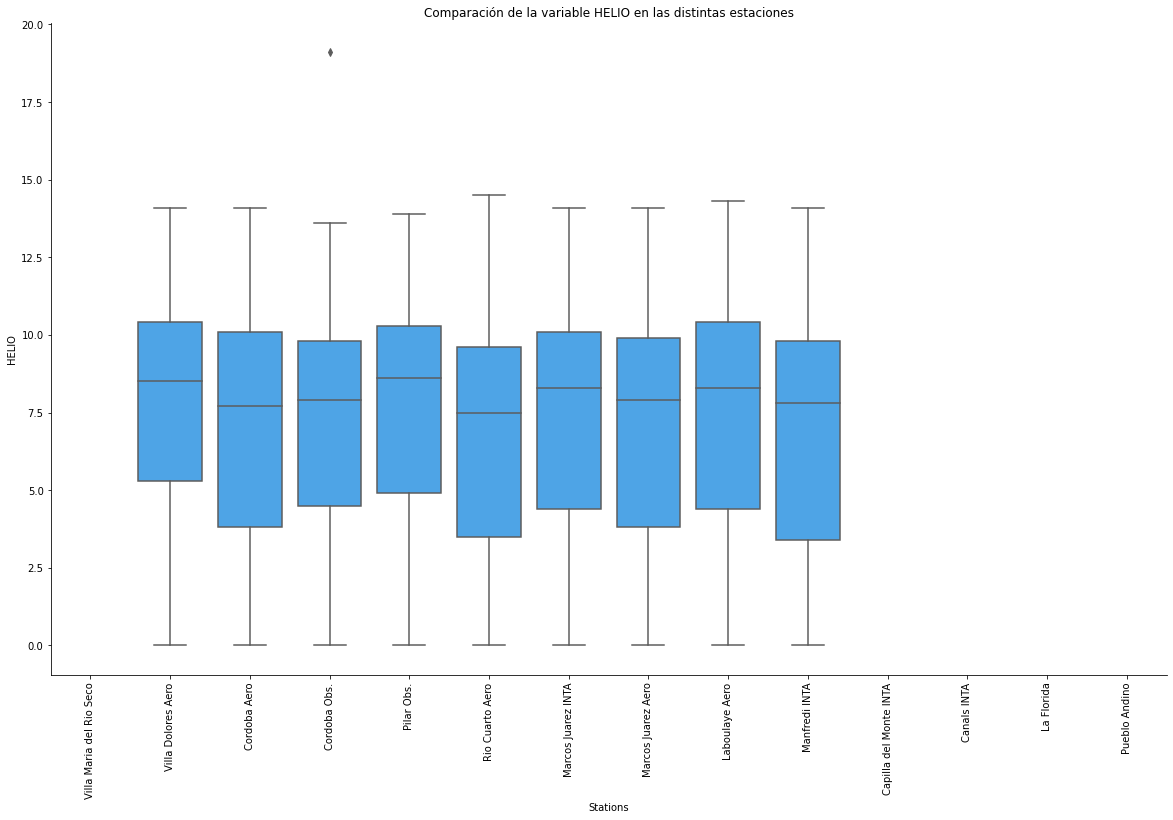

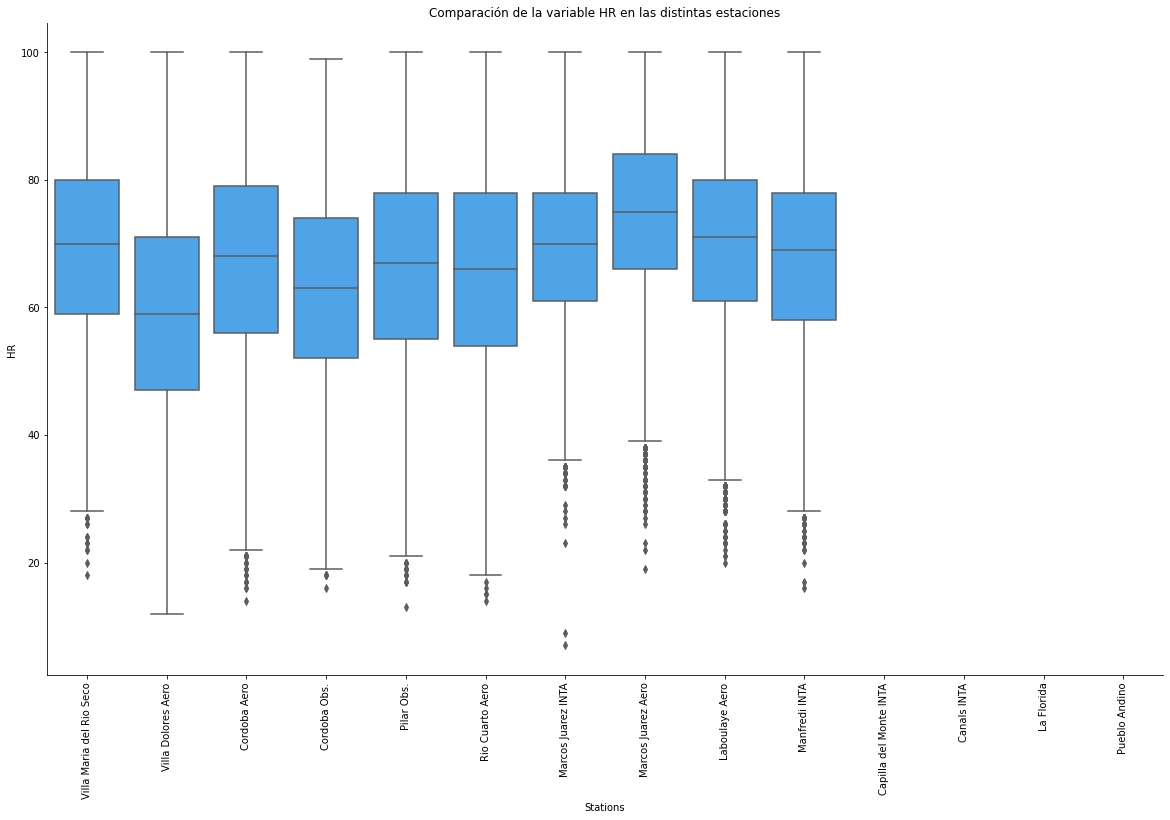

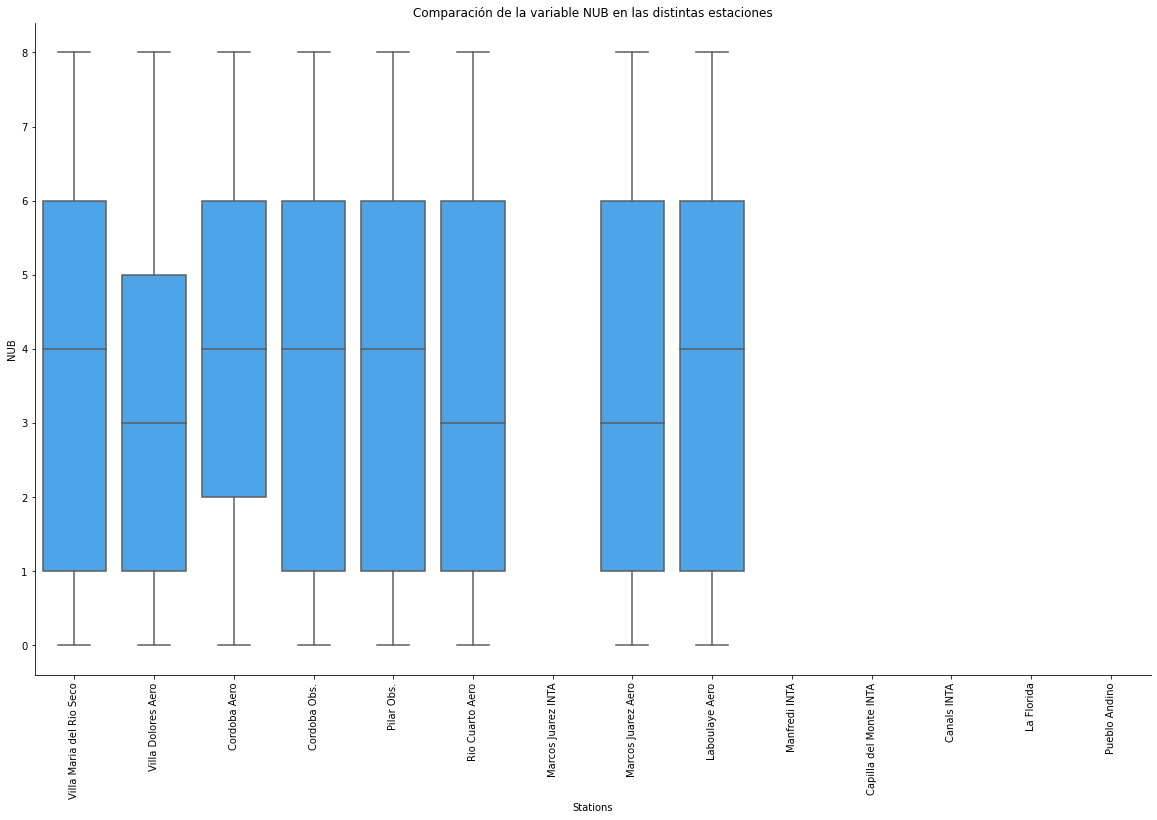

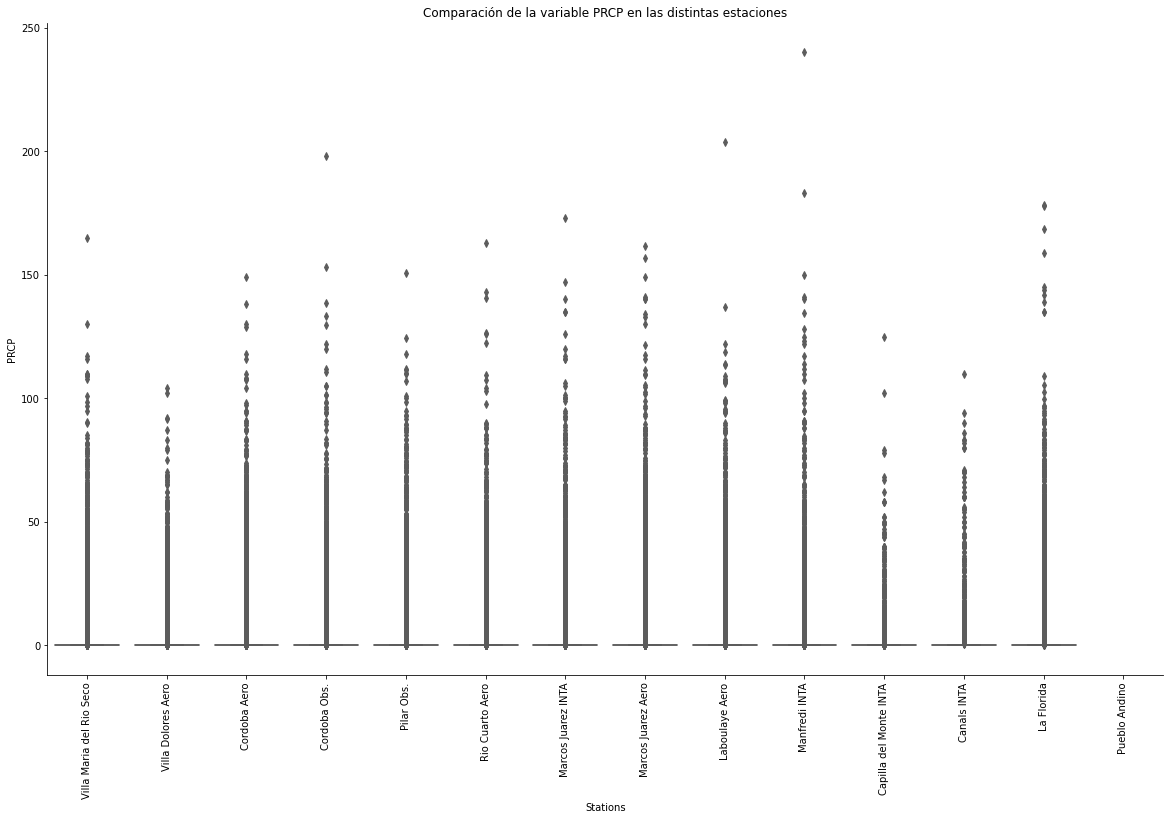

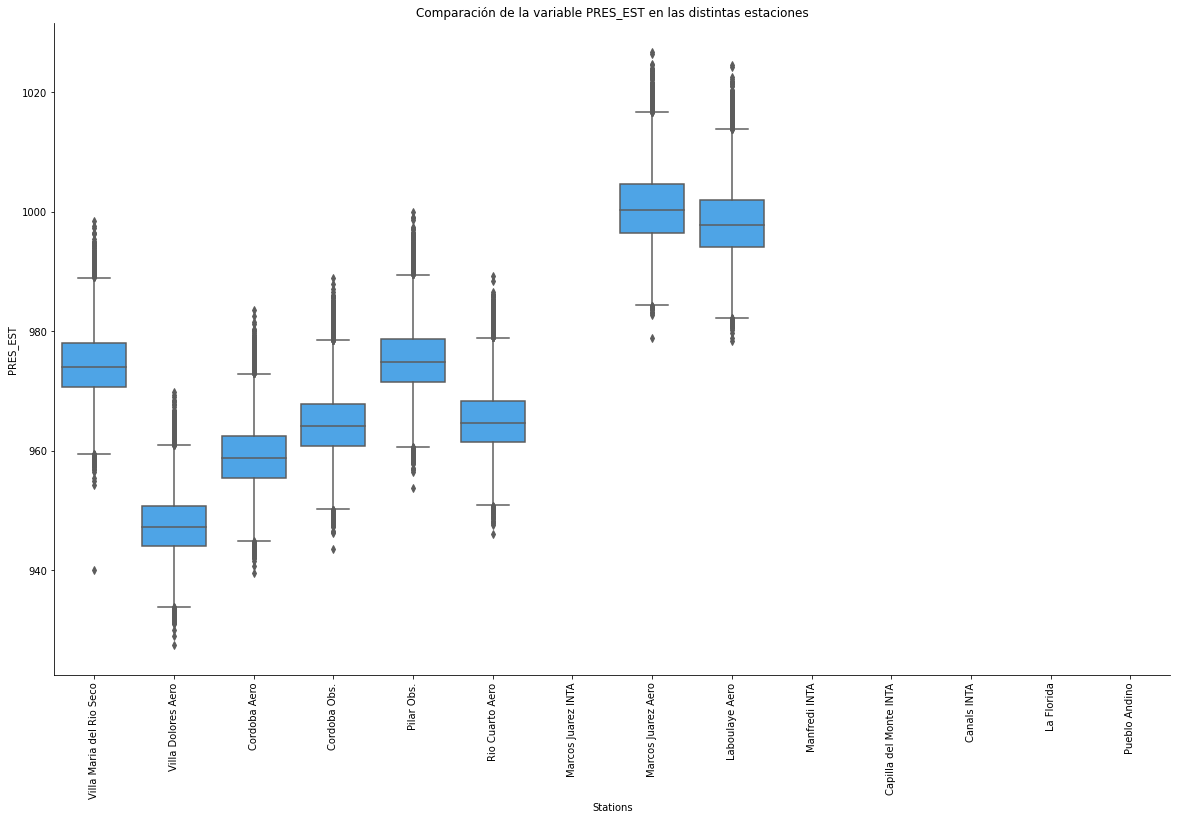

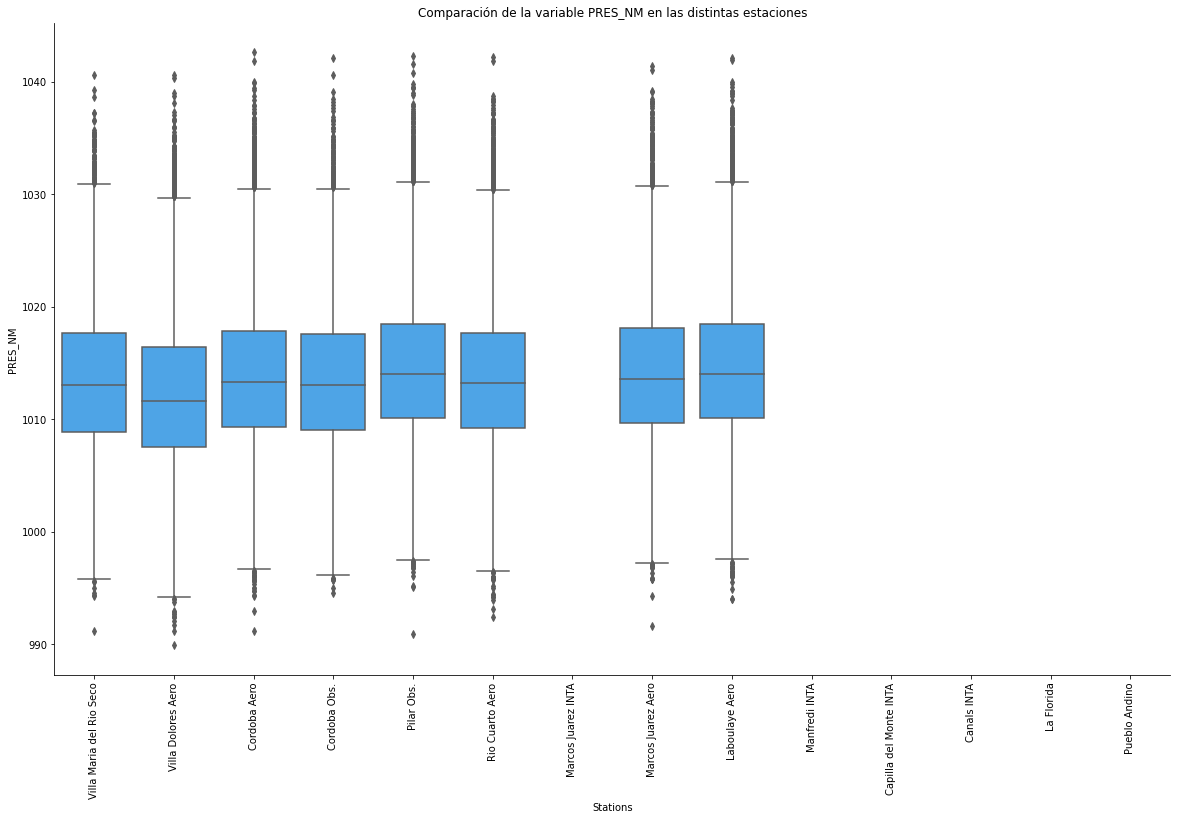

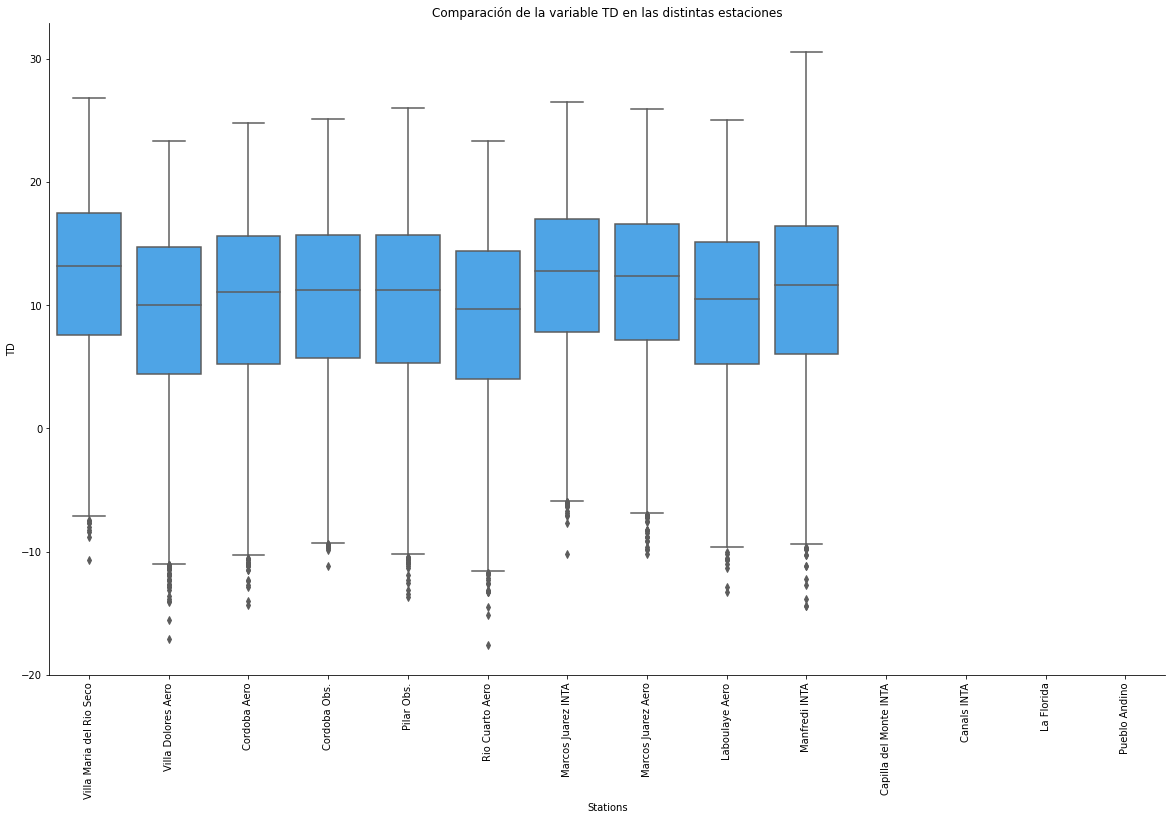

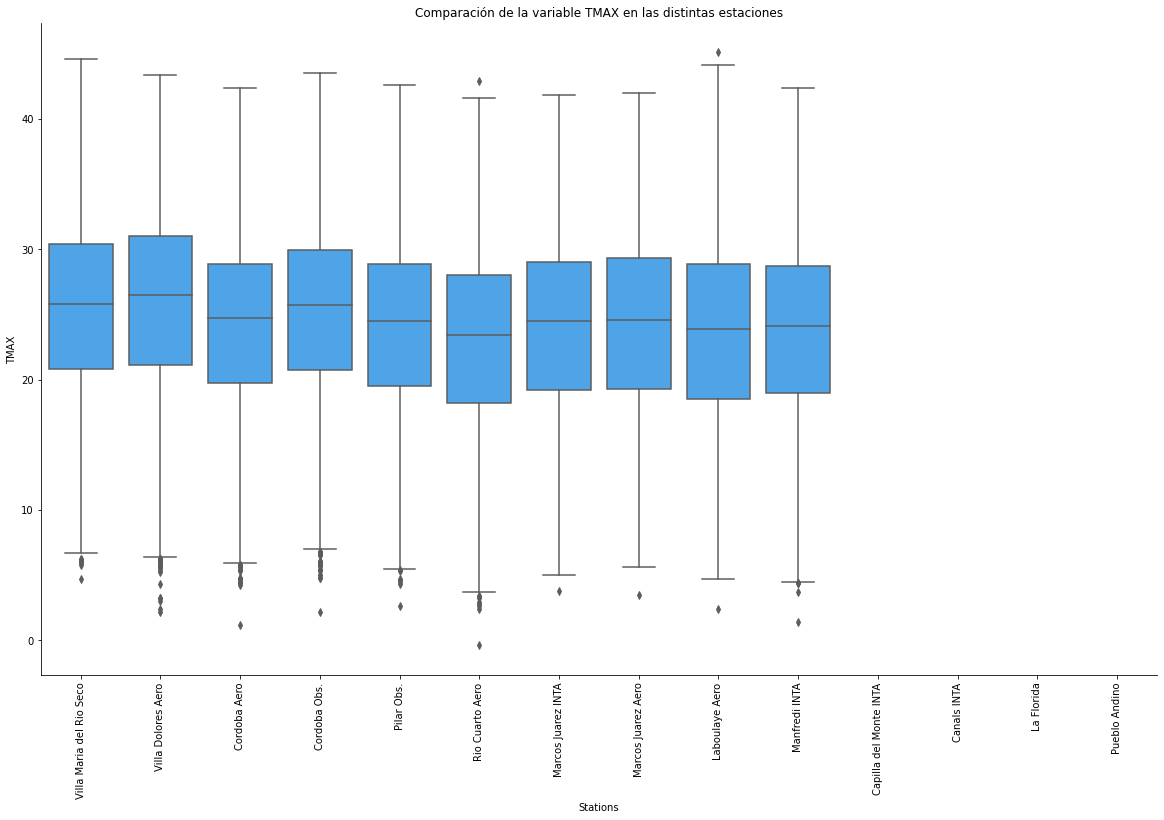

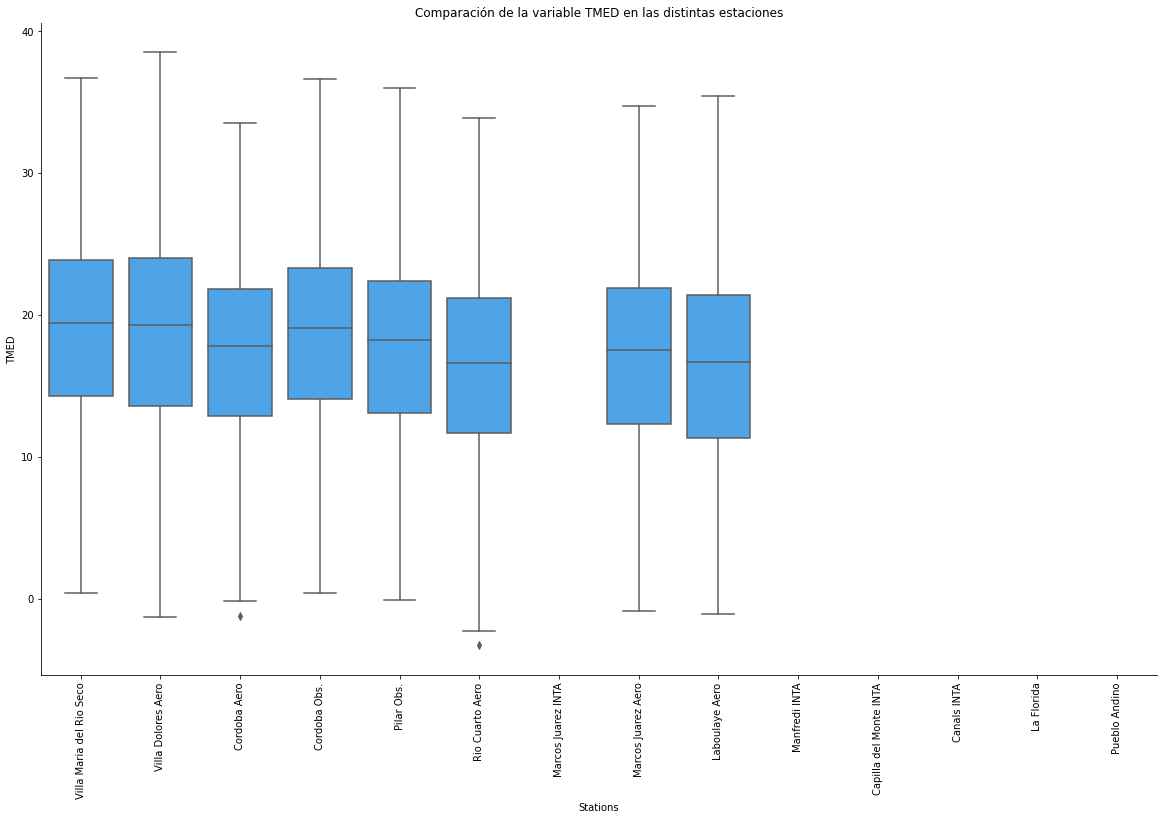

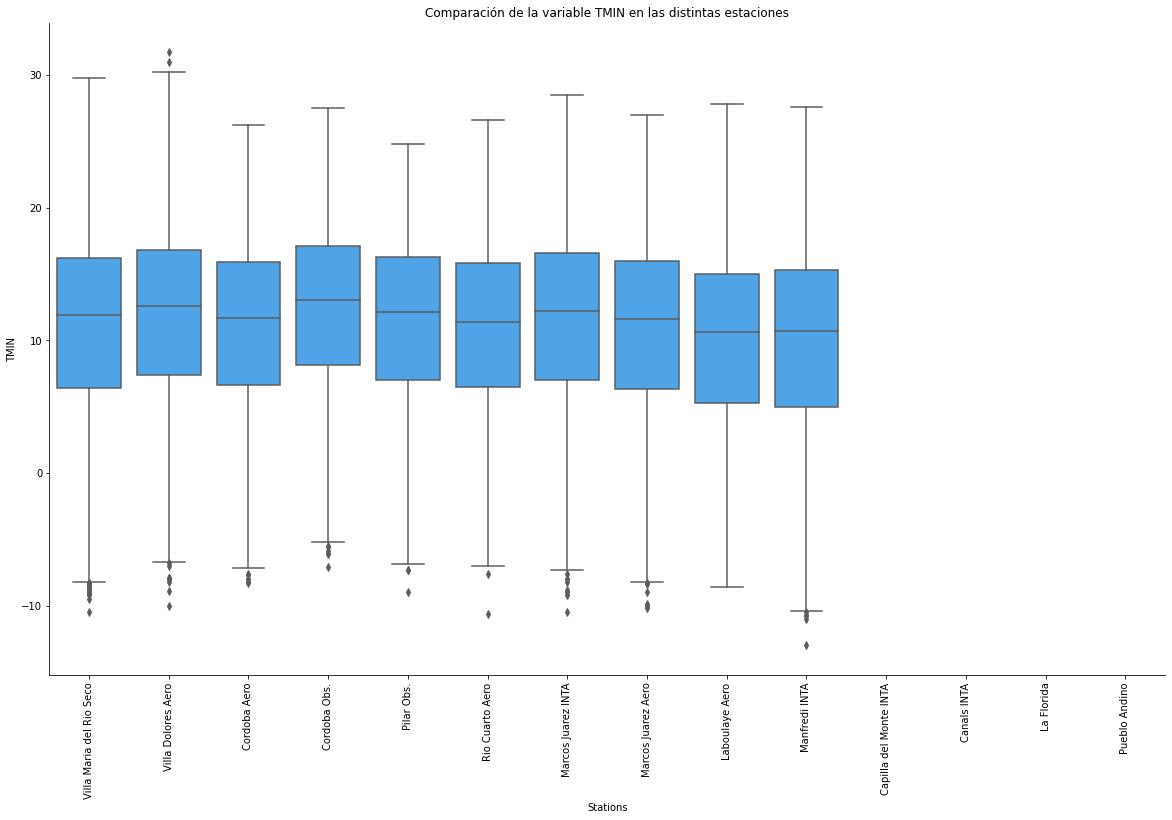

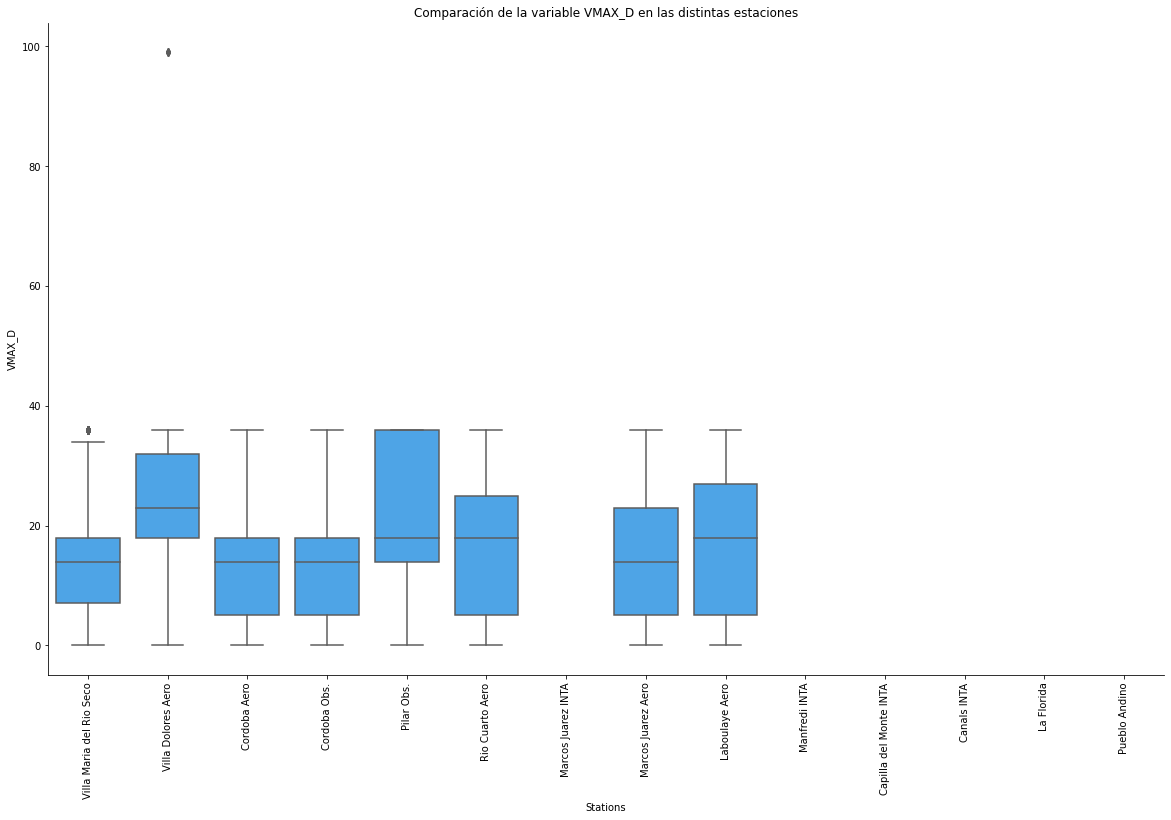

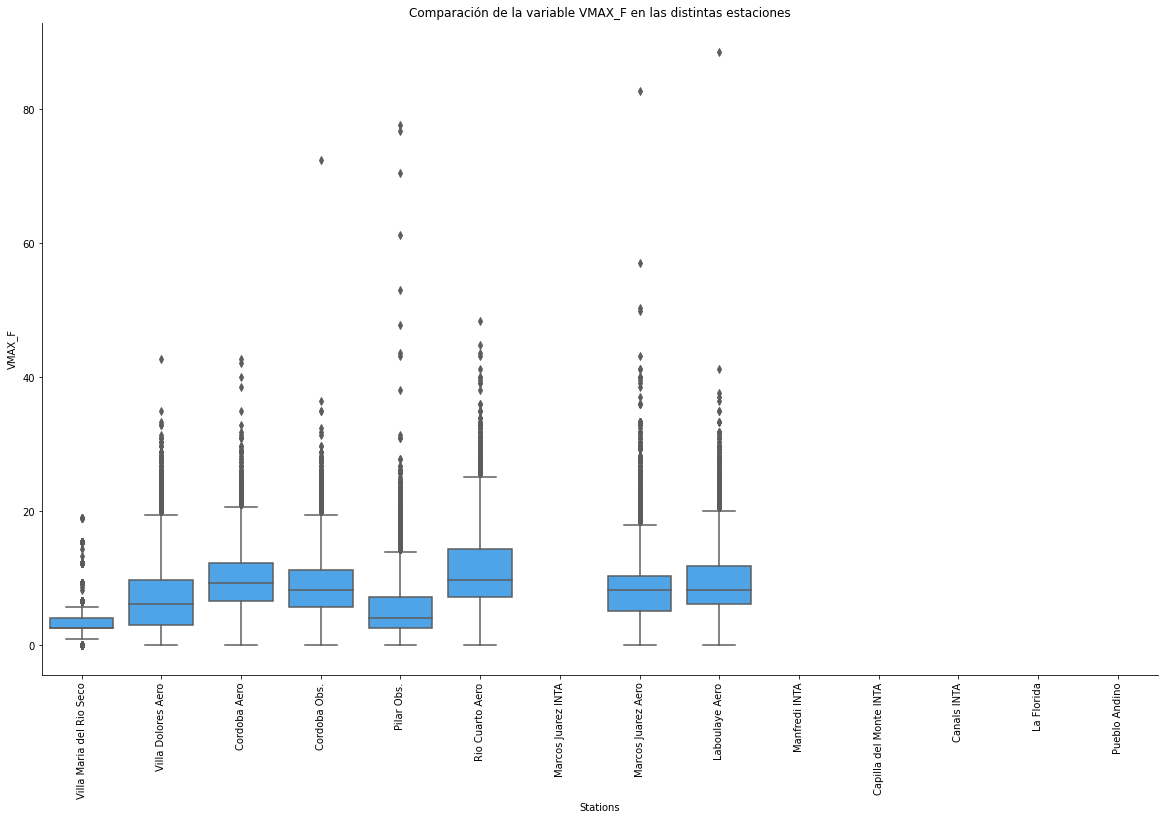

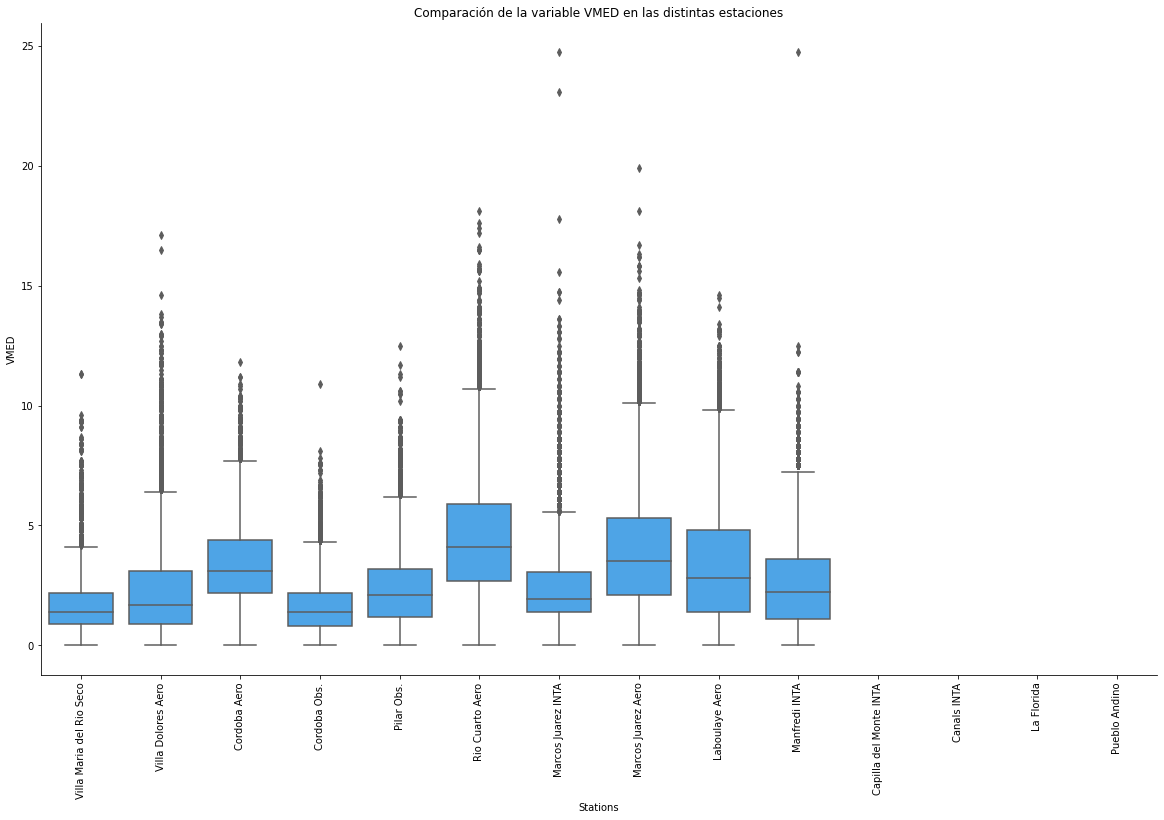

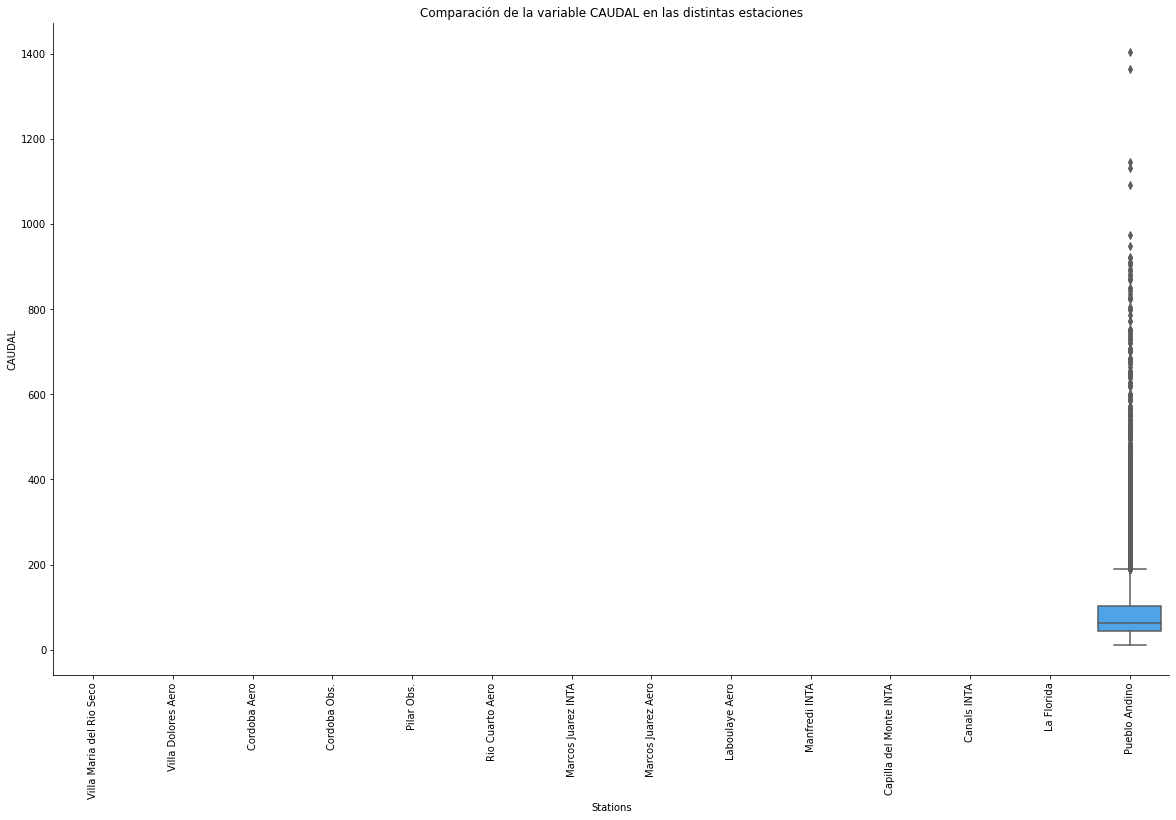

In [ ]:
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

dataset_with_stations = dataset.copy()
dataset_with_stations['station'] = dataset_with_stations['omm_id'].replace(stations)
dataset_with_stations.reset_index(inplace=True)
not_numeric_cols = ['fecha', 'id', 'omm_id', 'station']
numeric_cols = [c for c in dataset_with_stations.columns if c not in not_numeric_cols]
for numeric_col in numeric_cols:
  plt.figure(figsize=(20,12))
  sns.boxplot(data=dataset_with_stations,\
                    x='station', y=numeric_col,\
                    color=BLUE)
  plt.ylabel(numeric_col.upper())
  plt.xlabel('Stations')
  plt.title(f'Comparación de la variable {numeric_col.upper()} en las distintas estaciones')
  plt.xticks(rotation=90)
  sns.despine()

## 2. Agregación de datos
Año hidrológico: 1/agosto al 31/julio
Grupo M10-1:
  1. Acumulen anualmente los datos de *prcp* (Precipitación Total Anual o PTA), y grafique los promedios en función de la elevación de la estación (*elev*).
  2. Determinar la temperatura media diaria anual (TMedDA) de cada estación y determinar si existen tendencias.
  3. ¿Las series de PTA, responden a una distribución Normal?

Grupo M10-2:
  1. Determinar la precipitación máxima diaria anual (PMDA) de cada estación y grafique los promedios en función de la elevación de la estación (*elev*).
  2. Acumulen anualmente los datos de *caudal* (sólo la estación Pueblo Andino tiene estos datos), y determine si la serie es estacionaria (es decir, ¿Hay tendencia?).
  3. ¿Las series de PMDA, responden a una distribución Normal?

2.1 - Grupo M10-1

In [ ]:
def get_hydro_year(date_, start_month=7):
    year = date_.strftime('%Y')
    month = date_.strftime('%m')
    offset = 1 if int(month) >= start_month - 1 else 0
    hydro_year = int(year) + offset - 1
    return hydro_year

In [ ]:
dataset_with_hydro_year = dataset.copy()
dataset_with_hydro_year.reset_index(inplace=True)
dataset_with_hydro_year['hydro_year'] = dataset_with_hydro_year['fecha'].apply(lambda fecha: get_hydro_year(fecha))
dataset_with_hydro_year['station'] = dataset_with_hydro_year['omm_id'].replace(stations)
dataset_with_hydro_year['station_elev'] = dataset_with_hydro_year['omm_id'].replace(elevs)

In [ ]:
prcp_mean_by_hydro_year_and_station = dataset_with_hydro_year.groupby(['hydro_year', 'omm_id']).sum()['prcp'].groupby(['omm_id']).mean()
prcp_mean_by_hydro_year_and_station_dict = prcp_mean_by_hydro_year_and_station.to_frame().to_dict()
stations_df_prcp_mean = stations_dataset.copy()
stations_df_prcp_mean['prcp_mean'] = stations_dataset['omm_id'].replace(prcp_mean_by_hydro_year_and_station_dict['prcp'])
stations_df_prcp_mean[['omm_id', 'nombre', 'elev', 'prcp_mean']]

,omm_id,nombre,elev,prcp_mean
0,87244,Villa Maria del Rio Seco,341,786.336667
1,87328,Villa Dolores Aero,569,610.985000
2,87344,Cordoba Aero,474,835.306667
3,87345,Cordoba Obs.,426,786.160000
4,87349,Pilar Obs.,338,766.558333
5,87466,Marcos Juarez INTA,110,887.980769
6,87453,Rio Cuarto Aero,421,826.910000
7,87467,Marcos Juarez Aero,114,910.680000
8,87534,Laboulaye Aero,137,873.285000
9,9987009,Manfredi INTA,292,771.646939


Text(0.5, 0, 'Precipitación [mm]')

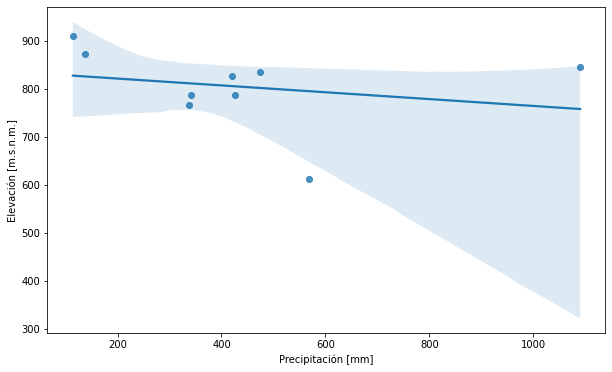

In [ ]:
plt.figure(figsize=(10,6))

ex = ['Pueblo Andino', 'Marcos Juarez INTA', 'Manfredi INTA', 'Capilla del Monte INTA', 'Canals INTA']

stations_df_prcp_mean_filtered = stations_df_prcp_mean[~stations_df_prcp_mean.nombre.isin(ex)]

ax = sns.regplot(x="elev", y="prcp_mean", data=stations_df_prcp_mean_filtered)
plt.ylabel('Elevación [m.s.n.m.]')
plt.xlabel("Precipitación [mm]")

2.2 - Grupo M10-2

In [ ]:
pueblo_andino_s_caudal_sum = dataset_with_hydro_year[dataset_with_hydro_year['omm_id'] == 2].groupby(['hydro_year'])['caudal'].sum()
pueblo_andino_s_caudal_sum

hydro_year
1979     4776.920000
1980    26842.196000
1981    22752.626000
1982    18063.433000
1983    30056.648000
1984    25702.124000
1985    26768.188000
1986    23429.423000
1987    24969.438000
1988    14887.941000
1989    17725.992000
1990    27159.531000
1992     8329.016000
1993    41478.948000
1994    24591.611000
1995    20122.878000
1996    11818.886000
1997    30084.455000
1998    30233.897000
1999    40710.882840
2000    38582.123230
2001    59214.508710
2002    37322.560500
2003    19279.782870
2004    35631.935130
2005    22152.961740
2006    41325.916970
2007    25554.459230
2008    17674.592240
2009    29793.352290
2010    22210.965248
2011    19134.404550
2012    54634.630840
2013    41864.833000
2014    58444.562949
2015    77834.273001
2016    49119.316340
2017     7431.643070
Name: caudal, dtype: float64

In [ ]:

adfuller_test = sm.tsa.stattools.adfuller(pueblo_andino_s_caudal_sum.dropna(), maxlag=5, autolag="AIC")
adf, p, critical_value = adfuller_test[0], adfuller_test[1], adfuller_test[4]["5%"]
p = round(p, 3)
conclusion = "Estacionaria" if p < 0.05 else "No Estacionaria"
print(conclusion)

Estacionaria


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
